In [1]:
from sklearn.metrics import mean_squared_error
from util import *
from utilLinealRegression import *

In [2]:
def load_normalized_data_set():
    # usualmente para evitar realizar las normalizacion de los datos cada vez que se realiza entrenamiento de modelos
    # se guarda los datos normalizados, su media y desviacion estandar en un archivo
    # esto es util cuando el dataset es muy grande y la normalizacion (o preparación de datos) es costosa.
    if not os.path.exists(normalized_file):
        return load_and_save_normalized_data_set()
    return read_normalized_data()

In [3]:
def load_raw_data_set():
    return load_iris_data()

In [4]:
def train_lineal_regression_model(study_case, lr):
    if study_case == 1:
        x, y = load_raw_data_set()
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # add column for the bias term (w0)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # train the model
    weights, history = gradient_descent(x_train, y_train, learning_rate = lr, iterations = 1000)

    # predict y values
    y_pred = predict(x_test, weights)

    # print results
    print_resuts(y_test, y_pred)

    # plot prediction vs real values
    plot_real_vs_predicted(y_test, y_pred)

    # plot loss function
    plot_loss_function(history)

## 1. Ejecutar el CASO DE ESTUDIO 1 y ajustar la tasa de aprendizaje

In [5]:
def study_case_1():
    lr_values = [0.01, 0.001, 0.05, 0.062]
    for lr in lr_values:
        # usar los datos crudos sin normalizar
        train_lineal_regression_model(study_case = 1, lr = lr)

Mean Squared Error MSE: 				0.143
Mean Squared Error MSE percentage: 		2.548%
Mean Absolute Percentage Error MAPE: 	11.009%


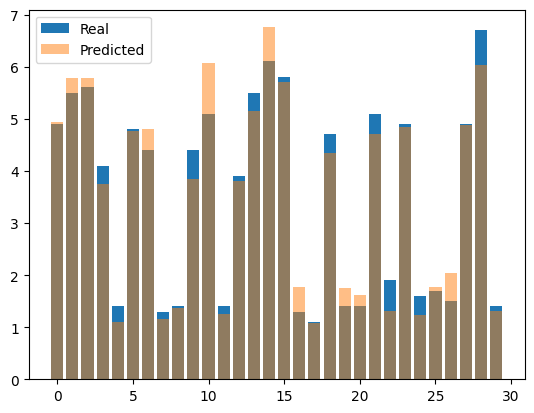

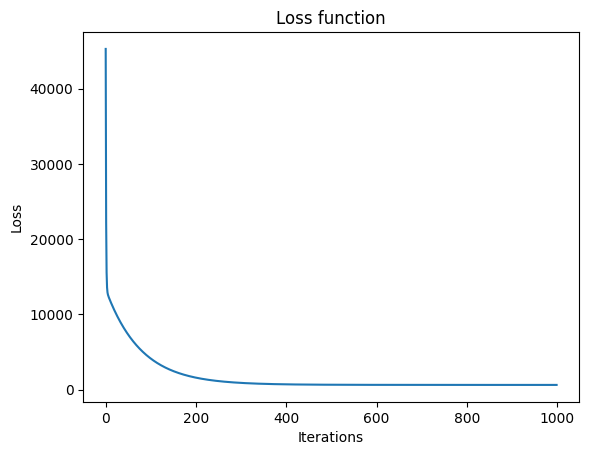

Mean Squared Error MSE: 				0.7
Mean Squared Error MSE percentage: 		12.499%
Mean Absolute Percentage Error MAPE: 	38.14%


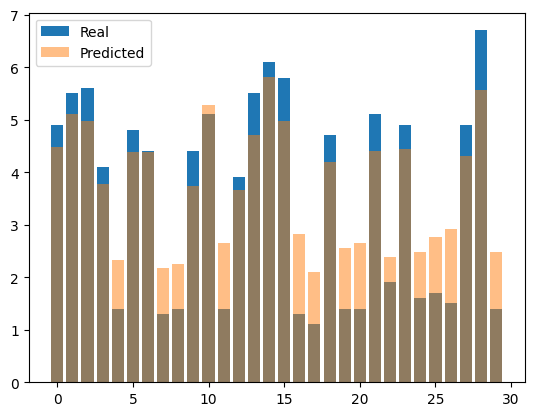

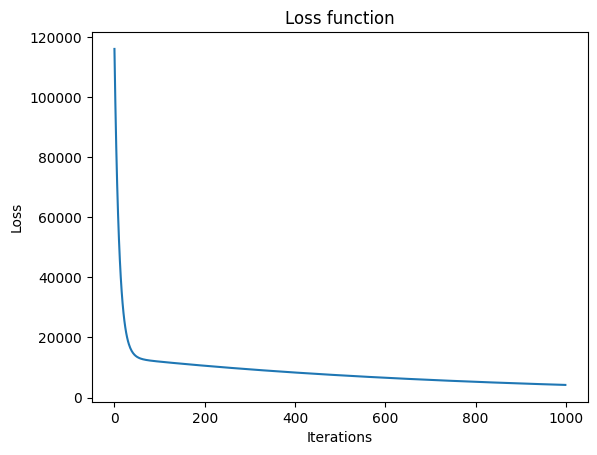

Mean Squared Error MSE: 				7.953208745260469e+256
Mean Squared Error MSE percentage: 		1.420215847367941e+258%
Mean Absolute Percentage Error MAPE: 	1.0989378456110843e+130%


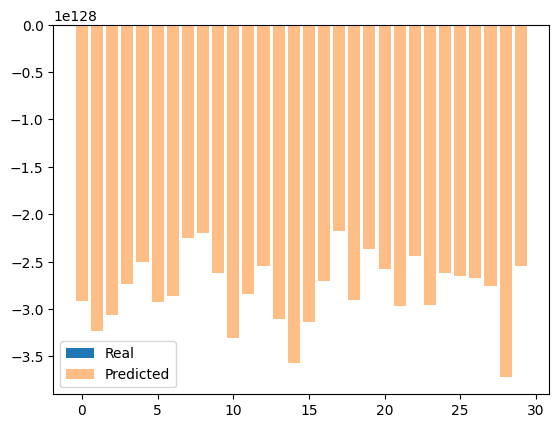

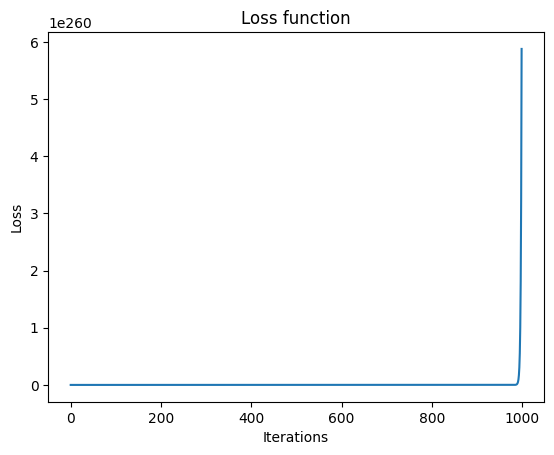

Mean Squared Error MSE: 				inf
Mean Squared Error MSE percentage: 		inf%
Mean Absolute Percentage Error MAPE: 	9.126804719024643e+281%


/Users/milene/Desktop/MAESTRIA CIENCIA DE DATOS/INTELIGENCIA ARTIFICIAL/TALLER 4/P2_LG/utilLinealRegression.py:5: RuntimeWarning: overflow encountered in scalar multiply
  return (1 / 2 * len(y)) * sum((y - y_hat) ** 2)
/Users/milene/Desktop/MAESTRIA CIENCIA DE DATOS/INTELIGENCIA ARTIFICIAL/TALLER 4/P2_LG/utilLinealRegression.py:5: RuntimeWarning: overflow encountered in scalar add
  return (1 / 2 * len(y)) * sum((y - y_hat) ** 2)
/Users/milene/Desktop/MAESTRIA CIENCIA DE DATOS/INTELIGENCIA ARTIFICIAL/TALLER 4/P2_LG/utilLinealRegression.py:5: RuntimeWarning: overflow encountered in square
  return (1 / 2 * len(y)) * sum((y - y_hat) ** 2)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:510: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


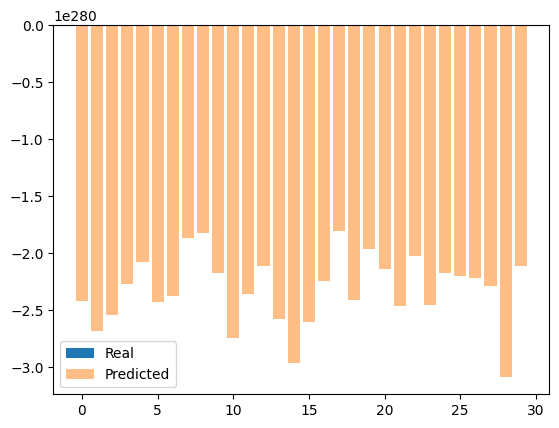

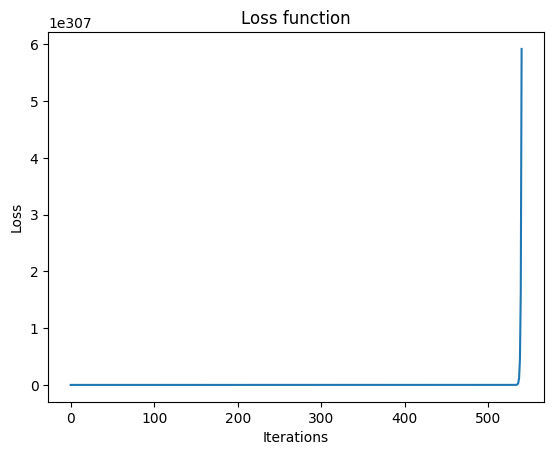

In [6]:
if __name__ == '__main__':
    study_case_1()

## 2. Implementar un nuevo criterio de parada basado en el costo

In [7]:
def gradient_descent_criterio_parada(x, y, learning_rate = 0.01, iterations = 1000, cost_threshold = 1e-6, seed = 123):
    np.random.seed(seed)
    weights = np.zeros(x.shape[1])
    m = len(y)
    history = dict(cost = [], weights = [])
    for _ in range(iterations):
        # calculate the gradient
        gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        # update weights
        weights = weights - learning_rate * gradients
        # calculate the loss function
        cost = loss_function(y, predict(x, weights))
        history['cost'].append(cost)
        history['weights'].append(weights)
        # CRITERIO DE PARADA BASADO EN EL VALOR DE COSTO (se detiene si es que el cambio en el costo es menor que el umbral)
        if len(history['cost']) > 1 and abs(history['cost'][-1] - history['cost'][-2]) < cost_threshold:
            print(f'Detención temprana en la iteración número: {_}')
            break
    return weights, history


In [14]:
def train_lineal_regression_model_modified(study_case, lr):
    if study_case == 1:
        x, y = load_raw_data_set()
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # add column for the bias term (w0)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # train the model
    weights, history = gradient_descent_criterio_parada(x_train, y_train, learning_rate = lr, iterations = 1000)
    print(f'Pesos finales: {weights}')
    print(f'Costo final: {history["cost"][-1]}')
    print (history['cost'][:5], len(history['cost']))

    # predict y values
    y_pred = predict(x_test, weights)

    # print results
    print_resuts(y_test, y_pred)

    # plot prediction vs real values
    plot_real_vs_predicted(y_test, y_pred)

    # plot loss function
    plot_loss_function(history)

In [15]:
def study_case_1_part2():
    # lr_values = [0.01, 0.001, 0.05, 0.062]
    # for lr in lr_values:
    lr = 0.01
    # usar los datos crudos sin normalizar
    train_lineal_regression_model_modified(study_case = 1, lr = lr)

Pesos finales: [-0.11055983  0.76040764 -0.7388016   1.40302851]
Costo final: 645.6592346887134
[45261.33405656543, 22206.147668882273, 15577.364793614113, 13590.996641736625, 12917.704935086356] 1000
Mean Squared Error MSE: 				0.143
Mean Squared Error MSE percentage: 		2.548%
Mean Absolute Percentage Error MAPE: 	11.009%


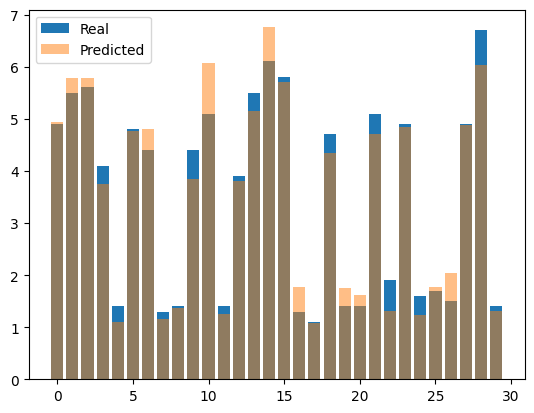

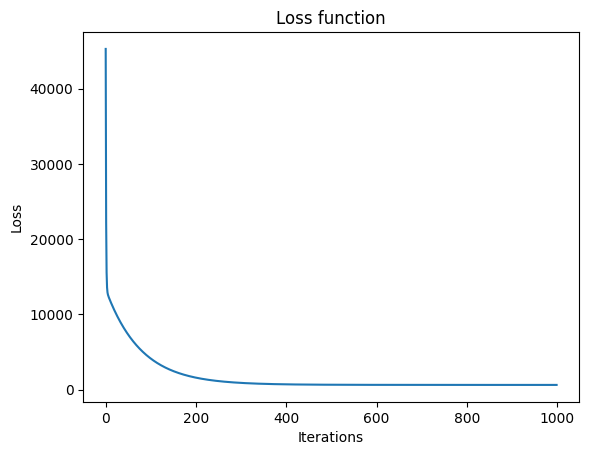

In [16]:
if __name__ == '__main__':
    study_case_1_part2()

## 3. Cambiar la variable objetivo

In [17]:
def load_iris_data_petalwidth_prediction():
    iris = load_iris()
    # We choose three features to predict one feature (Petal Width)
    x = iris.data[:, [0, 1, 2]]  # Sepal Length, Sepal Width, Petal Length
    # We assume that we want to predict the petal width
    y = iris.data[:, 3]  # PETAL WIDTH
    return x, y

In [18]:
def load_raw_data():
    return load_iris_data_petalwidth_prediction()

In [19]:
def train_lineal_regression_model_modified(study_case, lr):
    if study_case == 1:
        x, y = load_raw_data()
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # add column for the bias term (w0)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # train the model
    weights, history = gradient_descent_criterio_parada(x_train, y_train, learning_rate = lr, iterations = 1000)
    print(f'Pesos finales: {weights}')
    print(f'Costo final: {history["cost"][-1]}')

    # predict y values
    y_pred = predict(x_test, weights)

    # print results
    print_resuts(y_test, y_pred)

    # plot prediction vs real values
    plot_real_vs_predicted(y_test, y_pred)

    # plot loss function
    plot_loss_function(history)

In [20]:
def study_case_1_part3():
    # lr_values = [0.01, 0.001, 0.05, 0.062]
    # for lr in lr_values:
    lr = 0.01
    # usar los datos crudos sin normalizar
    train_lineal_regression_model_modified(study_case = 1, lr = lr)

Pesos finales: [-0.0459778  -0.10718261  0.05226022  0.45596988]
Costo final: 285.6263177161887
Mean Squared Error MSE: 				0.037
Mean Squared Error MSE percentage: 		1.678%
Mean Absolute Percentage Error MAPE: 	28.719%


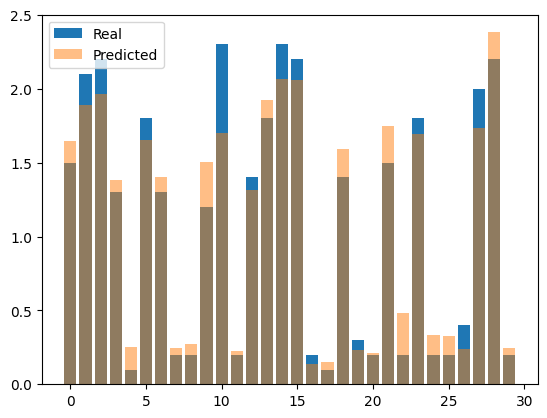

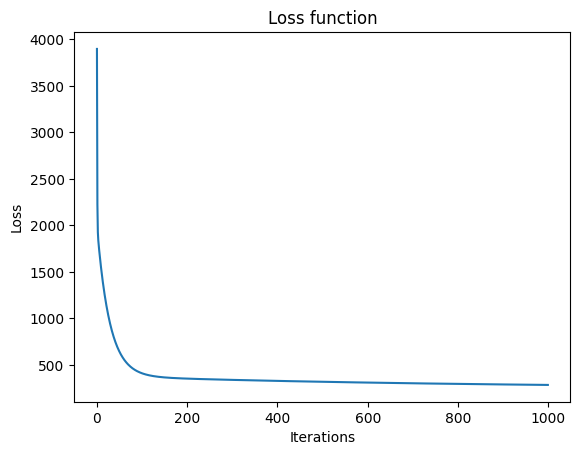

In [21]:
if __name__ == '__main__':
    study_case_1_part3()

## 4. Implementar normalización de datos (CASO DE ESTUDIO 2)

In [5]:
def study_case_2():
    lr = 0.01
    # usar los datos normalizados
    train_lineal_regression_model(study_case = 2, lr = lr)

Mean Squared Error MSE: 				0.047
Mean Squared Error MSE percentage: 		1.491%
Mean Absolute Percentage Error MAPE: 	26.278%


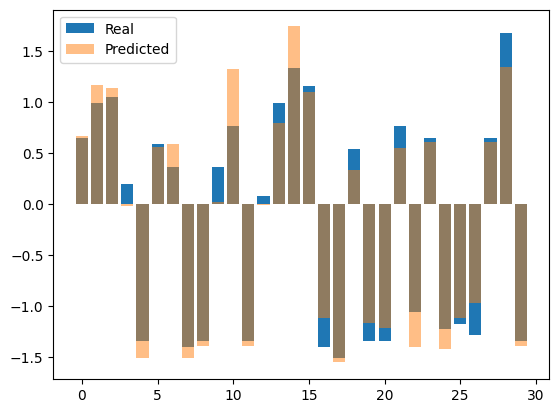

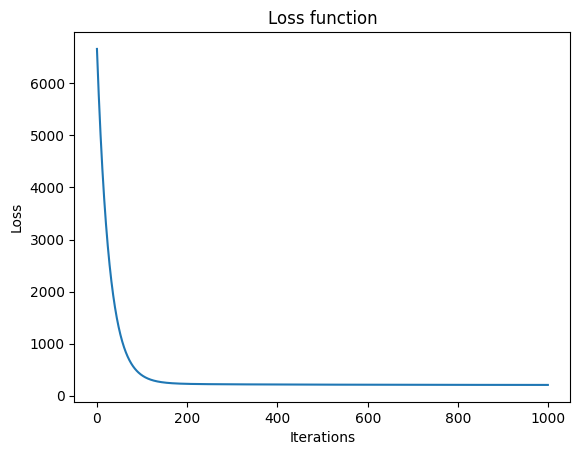

In [6]:
if __name__ == '__main__':
    study_case_2()

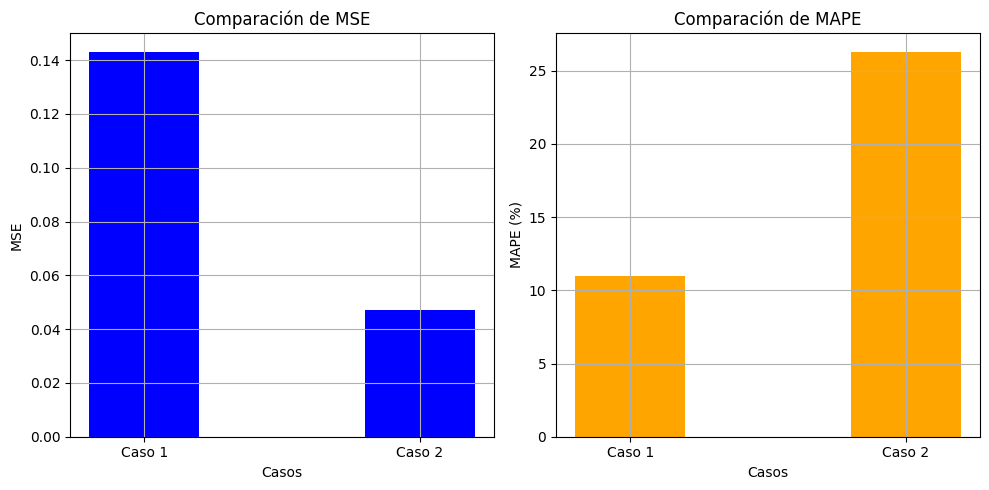

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de los dos casos
metrics = ['MSE', 'MAPE']
case_1_mse = 0.143
case_1_mape = 11.009
case_2_mse = 0.047
case_2_mape = 26.278

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de barras para MSE
ax1.bar(['Caso 1', 'Caso 2'], [case_1_mse, case_2_mse], color='blue', width=0.4)
ax1.set_title('Comparación de MSE')
ax1.set_ylabel('MSE')
ax1.set_xlabel('Casos')
ax1.grid(True)

# Gráfico de barras para MAPE
ax2.bar(['Caso 1', 'Caso 2'], [case_1_mape, case_2_mape], color='orange', width=0.4)
ax2.set_title('Comparación de MAPE')
ax2.set_ylabel('MAPE (%)')
ax2.set_xlabel('Casos')
ax2.grid(True)

# Ajustar la presentación
plt.tight_layout()
plt.show()

## 5. Reducir variables de entrada

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [10]:
# Funciones auxiliares de normalización y métricas
def normalize_data(x, y):
    x_mean = x.mean(axis=0)
    y_mean = y.mean()
    x_std = x.std(axis=0)
    y_std = y.std()
    
    x_norm = (x - x_mean) / x_std
    y_norm = (y - y_mean) / y_std
    return x_norm, y_norm, x_mean, y_mean, x_std, y_std

In [11]:
def unnormalize_y(y, y_mean, y_std):
    return y * y_std + y_mean

In [12]:
def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [13]:
def predict(x, weights):
    return np.dot(x, weights)

In [14]:
# Gradiente descendente con criterio de parada
def gradient_descent_criterio_parada(x, y, learning_rate=0.01, iterations=1000, cost_threshold=1e-6, seed=123):
    np.random.seed(seed)
    weights = np.zeros(x.shape[1])
    m = len(y)
    history = dict(cost=[], weights=[])
    
    for _ in range(iterations):
        gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        weights -= learning_rate * gradients
        cost = loss_function(y, predict(x, weights))
        history['cost'].append(cost)
        history['weights'].append(weights)
        
        if len(history['cost']) > 1 and abs(history['cost'][-1] - history['cost'][-2]) < cost_threshold:
            print(f'Detención temprana en la iteración número: {_}')
            break
    
    return weights, history

In [15]:
# Cargar y reducir variables del dataset Iris
def load_iris_data_reduced(n_features=2):
    iris = datasets.load_iris()
    if n_features == 2:
        x = iris.data[:, [0, 1]]  # Longitud y ancho del sépalo
    elif n_features == 1:
        x = iris.data[:, [0]]  # Solo longitud del sépalo
    y = iris.data[:, 2]  # Longitud del pétalo
    return x, y

In [16]:
# Entrenar el modelo con los datos normalizados
def study_case_reduced(n_features=2):
    lr = 0.01
    print(f"Estudiando el caso con {n_features} variable(s)...")
    
    # Cargar datos
    x, y = load_iris_data_reduced(n_features=n_features)
    
    # Normalización
    x, y, x_mean, y_mean, x_std, y_std = normalize_data(x, y)
    
    # Dividir en conjunto de entrenamiento y prueba
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Añadir columna de sesgo (bias) para w0
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]
    
    # Entrenar el modelo
    weights, history = gradient_descent_criterio_parada(x_train, y_train, learning_rate=lr, iterations=1000)
    
    # Predicción y desnormalización del resultado
    y_pred_norm = predict(x_test, weights)
    y_pred = unnormalize_y(y_pred_norm, y_mean, y_std)  # Desnormalizar las predicciones
    
    # Calcular el error cuadrático medio (MSE)
    mse = loss_function(y_test * y_std + y_mean, y_pred)
    print(f'Pesos finales: {weights}')
    print(f'Error cuadrático medio (MSE): {mse}')
    
    # Graficar la función de pérdida
    plot_loss_function(history)

In [17]:
# Función para graficar la función de pérdida
def plot_loss_function(history):
    plt.plot(history['cost'])
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss function over iterations')
    plt.show()

Estudiando el caso con 2 variable(s)...
Detención temprana en la iteración número: 473
Pesos finales: [ 0.01802142  0.81649078 -0.33221935]
Error cuadrático medio (MSE): 0.3537276167076809


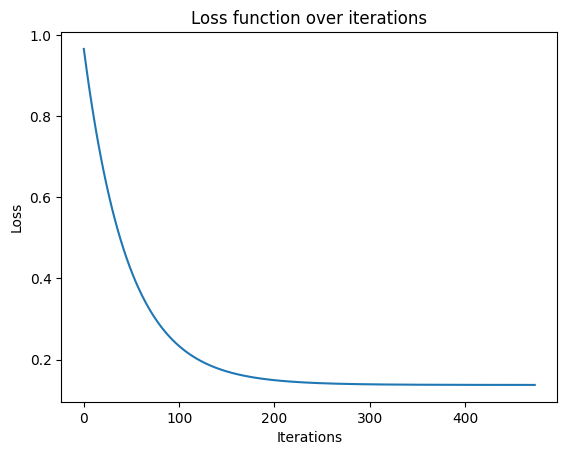

Estudiando el caso con 1 variable(s)...
Detención temprana en la iteración número: 485
Pesos finales: [0.01630276 0.85326695]
Error cuadrático medio (MSE): 0.5979145301292169


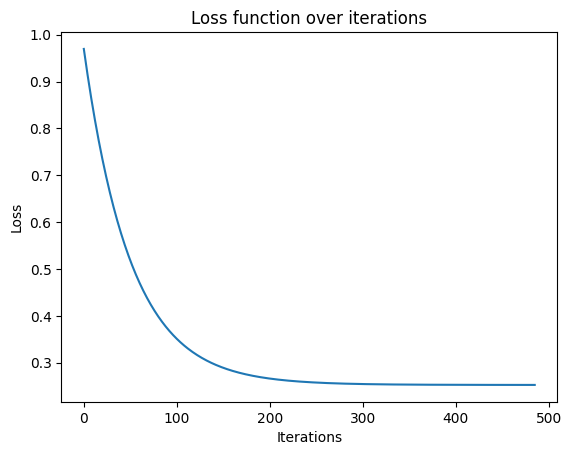

In [18]:
# Llamar a las funciones para comparar
if __name__ == '__main__':
    study_case_reduced(n_features=2)  # Caso con 2 variables
    study_case_reduced(n_features=1)  # Caso con 1 variable

## 6. Pesos aleatorios vs pesos en cero (CASO DE ESTUDIO 3)

In [19]:
# Función para cargar los datos de Iris
def load_iris_data_petalwidth_prediction():
    iris = load_iris()
    # Usar tres características para predecir la longitud del pétalo
    x = iris.data[:, [0, 1, 2]]  # Longitud y ancho del sépalo, longitud del pétalo
    y = iris.data[:, 3]  # Ancho del pétalo
    return x, y

In [20]:
# Función de gradiente descendente con opción para pesos aleatorios
def gradient_descent_random_weights(x, y, learning_rate=0.01, iterations=1000, cost_threshold=1e-6, seed=123, random_weights=False):
    np.random.seed(seed)
    
    if random_weights:
        # Inicializar los pesos de manera aleatoria
        weights = np.random.rand(x.shape[1])
        print("Pesos inicializados aleatoriamente:", weights)
    else:
        # Inicializar los pesos en cero
        weights = np.zeros(x.shape[1])
        print("Pesos inicializados en cero.")
    
    m = len(y)
    history = dict(cost=[], weights=[])
    
    for _ in range(iterations):
        gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        weights -= learning_rate * gradients
        cost = np.mean((np.dot(x, weights) - y) ** 2)  # Usamos la función de pérdida MSE
        history['cost'].append(cost)
        history['weights'].append(weights)
        
        if len(history['cost']) > 1 and abs(history['cost'][-1] - history['cost'][-2]) < cost_threshold:
            print(f'Detención temprana en la iteración número: {_}')
            break
    
    return weights, history

In [21]:
# Función para entrenar el modelo con diferentes pesos iniciales
def train_model_with_random_weights(study_case, lr, random_weights=False):
    if study_case == 1:
        # Usar los datos crudos del Iris dataset
        x, y = load_iris_data_petalwidth_prediction()
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # add column for the bias term (w0)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # Entrenar el modelo
    weights, history = gradient_descent_random_weights(x_train, y_train, learning_rate=lr, iterations=1000, random_weights=random_weights)
    
    # Predicción de valores
    y_pred = np.dot(x_test, weights)

    # Imprimir resultados
    print("Pesos finales:", weights)
    print("Predicciones:", y_pred)
    print("Valores reales:", y_test)

    # Graficar función de pérdida
    plot_loss_function(history)

In [22]:
# Casos de estudio
def study_case_3_random_weights():
    lr = 0.01
    # Caso con pesos aleatorios
    print("Estudiando el caso con pesos aleatorios...")
    train_model_with_random_weights(study_case=1, lr=lr, random_weights=True)

In [23]:
def study_case_3_zero_weights():
    lr = 0.01
    # Caso con pesos inicializados en cero
    print("Estudiando el caso con pesos inicializados en cero...")
    train_model_with_random_weights(study_case=1, lr=lr, random_weights=False)

Estudiando el caso con pesos aleatorios...
Pesos inicializados aleatoriamente: [0.69646919 0.28613933 0.22685145 0.55131477]
Pesos finales: [ 0.54308759 -0.25057414  0.0669      0.51147475]
Predicciones: [1.63794678 1.85299455 1.99099168 1.43761888 0.27217896 1.69542154
 1.3688294  0.31955855 0.35063603 1.58935871 1.63003724 0.16197447
 1.41548358 1.9281668  1.93436268 2.08160922 0.063997   0.22894102
 1.61252665 0.25709637 0.18362672 1.76031173 0.53959375 1.7215116
 0.33773908 0.28695431 0.18465936 1.83341867 2.29476752 0.24712154]
Valores reales: [1.5 2.1 2.2 1.3 0.1 1.8 1.3 0.2 0.2 1.2 2.3 0.2 1.4 1.8 2.3 2.2 0.2 0.1
 1.4 0.3 0.2 1.5 0.2 1.8 0.2 0.2 0.4 2.  2.2 0.2]


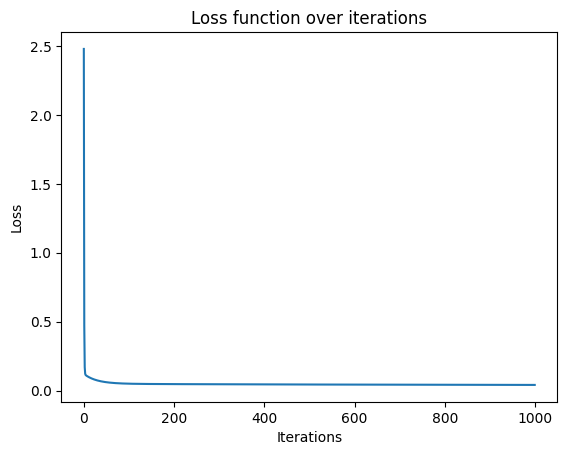

Estudiando el caso con pesos inicializados en cero...
Pesos inicializados en cero.
Pesos finales: [-0.0459778  -0.10718261  0.05226022  0.45596988]
Predicciones: [1.64367473 1.88979546 1.96781345 1.38005676 0.25532206 1.65636264
 1.40523775 0.24241228 0.2723312  1.5066619  1.70191527 0.22236862
 1.31605777 1.92195025 2.06691304 2.05874121 0.14018948 0.15148452
 1.59482137 0.23468418 0.21271523 1.75054677 0.48357321 1.69124136
 0.33553155 0.32806967 0.23687569 1.73438062 2.38230315 0.24460379]
Valores reales: [1.5 2.1 2.2 1.3 0.1 1.8 1.3 0.2 0.2 1.2 2.3 0.2 1.4 1.8 2.3 2.2 0.2 0.1
 1.4 0.3 0.2 1.5 0.2 1.8 0.2 0.2 0.4 2.  2.2 0.2]


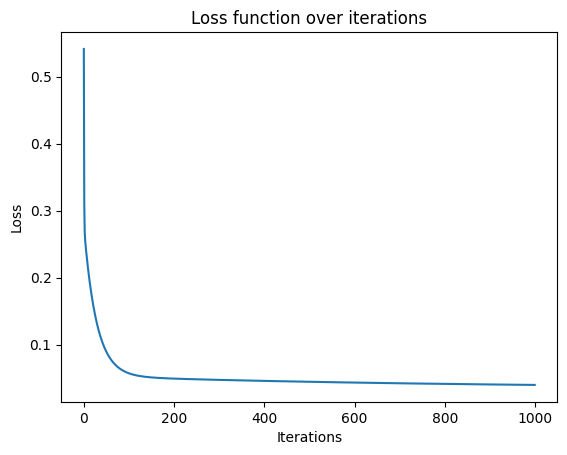

In [24]:
# Función principal para ejecutar ambos casos
if __name__ == '__main__':
    # Ejecutar caso con pesos aleatorios
    study_case_3_random_weights()
    
    # Ejecutar caso con pesos inicializados en cero
    study_case_3_zero_weights()

## 7. Implementación de diferentes tipos de gradiente descendente

Gradiente Descendente (batch):
Pesos finales: [ 0.54098952 -0.236258    0.04519034  0.50518391]
MSE: 0.05240148519798835


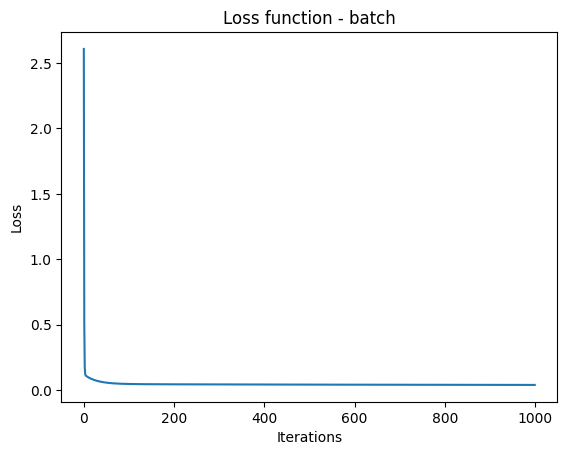

Gradiente Descendente (stochastic):
Pesos finales: [ 0.55015673 -0.25470695  0.0702835   0.47974469]
MSE: 0.08556910874924166


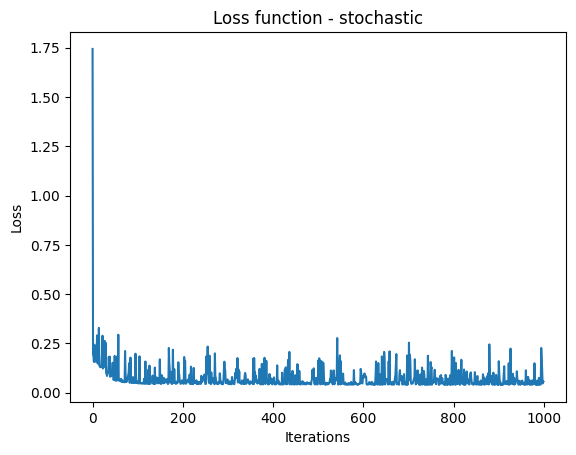

Gradiente Descendente (mini-batch):
Pesos finales: [ 0.54075751 -0.23568792  0.04607339  0.5092445 ]
MSE: 0.05068664835930081


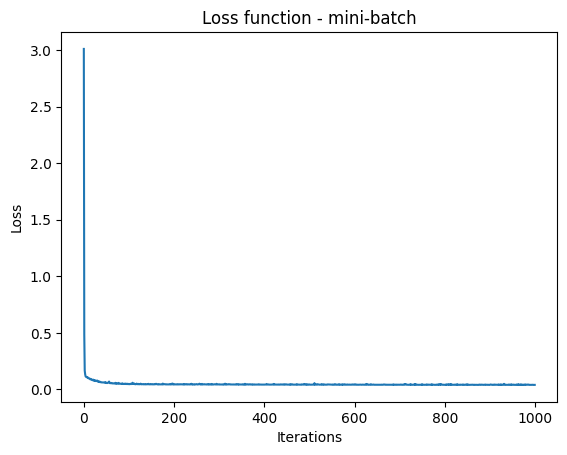

Batch Gradient Descent MSE: 0.05240148519798835
Stochastic Gradient Descent MSE: 0.08556910874924166
Mini-Batch Gradient Descent MSE: 0.05068664835930081


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Función para cargar los datos de Iris
def load_iris_data_petalwidth_prediction():
    iris = load_iris()
    # Usar tres características para predecir la longitud del pétalo
    x = iris.data[:, [0, 1, 2]]  # Longitud y ancho del sépalo, longitud del pétalo
    y = iris.data[:, 3]  # Ancho del pétalo
    return x, y

# Implementación de las variantes de Gradiente Descendente
def gradient_descent(x, y, learning_rate=0.01, iterations=1000, method='batch', batch_size=32):
    np.random.seed(123)
    weights = np.random.rand(x.shape[1])  # Pesos inicializados aleatoriamente
    m = len(y)
    history = dict(cost=[], weights=[])

    for i in range(iterations):
        if method == 'batch':
            gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        elif method == 'stochastic':
            # Seleccionar un ejemplo aleatorio en cada iteración
            idx = np.random.randint(0, m)
            x_i = x[idx, :].reshape(1, -1)
            y_i = y[idx]
            gradients = np.dot(x_i.T, (np.dot(x_i, weights) - y_i))  # Actualización de un solo ejemplo
        elif method == 'mini-batch':
            # Seleccionar un mini-lote aleatorio
            idx = np.random.choice(m, batch_size, replace=False)
            x_batch = x[idx, :]
            y_batch = y[idx]
            gradients = np.dot(x_batch.T, (np.dot(x_batch, weights) - y_batch)) / batch_size

        weights -= learning_rate * gradients
        cost = np.mean((np.dot(x, weights) - y) ** 2)
        history['cost'].append(cost)
        history['weights'].append(weights)

    return weights, history

# Función para entrenar el modelo y evaluar el error
def train_and_evaluate(method, learning_rate=0.01, iterations=1000, batch_size=32):
    x, y = load_iris_data_petalwidth_prediction()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Añadir columna para el sesgo
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # Entrenar el modelo
    weights, history = gradient_descent(x_train, y_train, learning_rate=learning_rate, iterations=iterations, method=method, batch_size=batch_size)

    # Predicción de valores
    y_pred = np.dot(x_test, weights)

    # Calcular el error de predicción (MSE)
    mse = np.mean((y_pred - y_test) ** 2)
    
    # Mostrar resultados
    print(f"Gradiente Descendente ({method}):")
    print(f"Pesos finales: {weights}")
    print(f"MSE: {mse}")
    
    # Graficar función de pérdida
    plt.plot(history['cost'])
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Loss function - {method}')
    plt.show()
    
    return mse

# Entrenar y evaluar los tres métodos
mse_batch = train_and_evaluate(method='batch')
mse_sgd = train_and_evaluate(method='stochastic')
mse_mini_batch = train_and_evaluate(method='mini-batch', batch_size=16)

# Comparación de resultados
print(f"Batch Gradient Descent MSE: {mse_batch}")
print(f"Stochastic Gradient Descent MSE: {mse_sgd}")
print(f"Mini-Batch Gradient Descent MSE: {mse_mini_batch}")
